<a href="https://colab.research.google.com/github/hongseoi/colab/blob/main/suk0719_openAPI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests

In [ ]:
#요청주소

url = "http://apis.data.go.kr/1360000/VilageFcstInfoService_2.0/getUltraSrtNcst"

service_key = "8F+z/ubqBl3Mj/2VtQVgj/FytAZ2kWY3hC4O8gdq4b+w4aLiuLCu9OULSAJoXH98doe8Eu/9oj1jiJv9p0G6Hw=="

#요청변수 영문명

payload = {'serviceKey':service_key,
           'pageNo':'1',
           'numOfRows':'1000',
           'dataType':'JSON',
           'base_date':'20220719',
           'base_time':'0500',
           'nx':'60', #서울 중구 필동 기준
           'ny':'127'}


In [ ]:
# 데이터 요청

reqs = requests.get(url, params=payload)

In [ ]:
print(reqs.url)

http://apis.data.go.kr/1360000/VilageFcstInfoService_2.0/getUltraSrtNcst?serviceKey=8F%2Bz%2FubqBl3Mj%2F2VtQVgj%2FFytAZ2kWY3hC4O8gdq4b%2Bw4aLiuLCu9OULSAJoXH98doe8Eu%2F9oj1jiJv9p0G6Hw%3D%3D&pageNo=1&numOfRows=1000&dataType=JSON&base_date=20220719&base_time=0500&nx=60&ny=127


In [ ]:
reqs.status_code #200: 정상작동

200

In [ ]:
reqs.text

'{"response":{"header":{"resultCode":"00","resultMsg":"NORMAL_SERVICE"},"body":{"dataType":"JSON","items":{"item":[{"baseDate":"20220719","baseTime":"0500","category":"PTY","nx":60,"ny":127,"obsrValue":"0"},{"baseDate":"20220719","baseTime":"0500","category":"REH","nx":60,"ny":127,"obsrValue":"86"},{"baseDate":"20220719","baseTime":"0500","category":"RN1","nx":60,"ny":127,"obsrValue":"0"},{"baseDate":"20220719","baseTime":"0500","category":"T1H","nx":60,"ny":127,"obsrValue":"24.4"},{"baseDate":"20220719","baseTime":"0500","category":"UUU","nx":60,"ny":127,"obsrValue":"0.6"},{"baseDate":"20220719","baseTime":"0500","category":"VEC","nx":60,"ny":127,"obsrValue":"244"},{"baseDate":"20220719","baseTime":"0500","category":"VVV","nx":60,"ny":127,"obsrValue":"0.3"},{"baseDate":"20220719","baseTime":"0500","category":"WSD","nx":60,"ny":127,"obsrValue":"0.7"}]},"pageNo":1,"numOfRows":1000,"totalCount":8}}}'

In [ ]:
type(reqs.text)

str

In [ ]:
#제이슨 객체로 바꾸기
import json
print(json.dumps(json.loads(reqs.text), sort_keys=True, indent=4))

{
    "response": {
        "body": {
            "dataType": "JSON",
            "items": {
                "item": [
                    {
                        "baseDate": "20220719",
                        "baseTime": "0500",
                        "category": "PTY",
                        "nx": 60,
                        "ny": 127,
                        "obsrValue": "0"
                    },
                    {
                        "baseDate": "20220719",
                        "baseTime": "0500",
                        "category": "REH",
                        "nx": 60,
                        "ny": 127,
                        "obsrValue": "86"
                    },
                    {
                        "baseDate": "20220719",
                        "baseTime": "0500",
                        "category": "RN1",
                        "nx": 60,
                        "ny": 127,
                        "obsrValue": "0"
                    },
          

In [ ]:
load_json = json.loads(reqs.text)
print(load_json.keys())
print(load_json['response'].keys())
print(load_json['response']['body'].keys())
print(load_json['response']['body']['items'].keys())
print(load_json['response']['body']['items'])



dict_keys(['response'])
dict_keys(['header', 'body'])
dict_keys(['dataType', 'items', 'pageNo', 'numOfRows', 'totalCount'])
dict_keys(['item'])
{'item': [{'baseDate': '20220719', 'baseTime': '0500', 'category': 'PTY', 'nx': 60, 'ny': 127, 'obsrValue': '0'}, {'baseDate': '20220719', 'baseTime': '0500', 'category': 'REH', 'nx': 60, 'ny': 127, 'obsrValue': '86'}, {'baseDate': '20220719', 'baseTime': '0500', 'category': 'RN1', 'nx': 60, 'ny': 127, 'obsrValue': '0'}, {'baseDate': '20220719', 'baseTime': '0500', 'category': 'T1H', 'nx': 60, 'ny': 127, 'obsrValue': '24.4'}, {'baseDate': '20220719', 'baseTime': '0500', 'category': 'UUU', 'nx': 60, 'ny': 127, 'obsrValue': '0.6'}, {'baseDate': '20220719', 'baseTime': '0500', 'category': 'VEC', 'nx': 60, 'ny': 127, 'obsrValue': '244'}, {'baseDate': '20220719', 'baseTime': '0500', 'category': 'VVV', 'nx': 60, 'ny': 127, 'obsrValue': '0.3'}, {'baseDate': '20220719', 'baseTime': '0500', 'category': 'WSD', 'nx': 60, 'ny': 127, 'obsrValue': '0.7'}]}


In [ ]:
df = pd.DataFrame(load_json)
df.head()

,response
body,"{'dataType': 'JSON', 'items': {'item': [{'base..."
header,"{'resultCode': '00', 'resultMsg': 'NORMAL_SERV..."


In [ ]:
#for문 이용해 여러번 요청하기

import time

payload = {'serviceKey':service_key,
           'pageNo':'1',
           'numOfRows':'1000',
           'dataType':'JSON',
           'base_date':'20220719',
           'base_time':'0500',
           'nx':'60', #서울 중구 필동 기준
           'ny':'127'}

time_list = ['0000','0200','0400','0600','0800','1000','1200','1400']

pieces = list()

In [ ]:
for i in time_list:
  payload['base)time'] = i
  reqs = requests.get(url, params=payload)
  time.sleep(1)
  load_json = json.loads(reqs.text)
  df = pd.DataFrame(load_json['response']['body']['items']['item'])
  pieces.append(df)



KeyError: ignored

In [ ]:
#요청주소

url = "http://apis.data.go.kr/1360000/AsosDalyInfoService/getWthrDataList"

service_key = "8F+z/ubqBl3Mj/2VtQVgj/FytAZ2kWY3hC4O8gdq4b+w4aLiuLCu9OULSAJoXH98doe8Eu/9oj1jiJv9p0G6Hw=="

#요청변수 영문명

payload = {'serviceKey':service_key,
           'pageNo':'1',
           'numOfRows':'999',
           'dataType':'JSON',
           'dataCd':'ASOS',
           'dateCd':'DAY',
           'startDt':'20200101',
           'endDt':'20220701',
           'stnIds':'108' #서울지점
           }
reqs = requests.get(url, params=payload)
load_json =json.loads(reqs.text)
print(load_json)

{'response': {'header': {'resultCode': '00', 'resultMsg': 'NORMAL_SERVICE'}, 'body': {'dataType': 'JSON', 'items': {'item': [{'stnId': '108', 'stnNm': '서울', 'tm': '2020-01-01', 'avgTa': '-2.2', 'minTa': '-6.5', 'minTaHrmt': '0001', 'maxTa': '0.3', 'maxTaHrmt': '1457', 'mi10MaxRn': '', 'mi10MaxRnHrmt': '', 'hr1MaxRn': '', 'hr1MaxRnHrmt': '', 'sumRnDur': '9.83', 'sumRn': '0.1', 'maxInsWs': '4.8', 'maxInsWsWd': '50', 'maxInsWsHrmt': '0906', 'maxWs': '2.6', 'maxWsWd': '50', 'maxWsHrmt': '0904', 'avgWs': '0.6', 'hr24SumRws': '509', 'maxWd': '50', 'avgTd': '-8.1', 'minRhm': '37', 'minRhmHrmt': '0002', 'avgRhm': '64.4', 'avgPv': '3.4', 'avgPa': '1021.1', 'maxPs': '1034.0', 'maxPsHrmt': '0952', 'minPs': '1031.2', 'minPsHrmt': '1418', 'avgPs': '1032.1', 'ssDur': '9.6', 'sumSsHr': '0.8', 'hr1MaxIcsrHrmt': '1100', 'hr1MaxIcsr': '1.0', 'sumGsr': '4.53', 'ddMefs': '0.0', 'ddMefsHrmt': '', 'ddMes': '0.0', 'ddMesHrmt': '', 'sumDpthFhsc': '0.0', 'avgTca': '8.9', 'avgLmac': '8.9', 'avgTs': '-0.9', 'min

In [ ]:
df_weather_days = pd.DataFrame(load_json['response']['body']['items']['item'])
df_weather_days.head()

,stnId,stnNm,tm,avgTa,minTa,minTaHrmt,maxTa,maxTaHrmt,mi10MaxRn,mi10MaxRnHrmt,...,avgM05Te,avgM10Te,avgM15Te,avgM30Te,avgM50Te,sumLrgEv,sumSmlEv,n99Rn,iscs,sumFogDur
0,108,서울,2020-01-01,-2.2,-6.5,0001,0.3,1457,,,...,4.1,7.2,9.8,15.3,17.0,0.4,0.6,0.1,-{눈}-0230. {눈}0335-0440. {눈}0520-{눈}{강도0}0600-...,
1,108,서울,2020-01-02,1.0,-0.7,0001,3.8,1500,,,...,3.7,7.0,9.7,15.2,17.0,0.7,1.0,,-{연무}-{연무}{강도0}0300-{연무}{강도0}0600-{연무}{강도0}090...,
2,108,서울,2020-01-03,-0.1,-3.4,0807,4.6,1547,,,...,3.6,6.8,9.6,15.1,16.9,1.4,1.9,,{박무}0110-{박무}{강도1}0300-{박무}{강도1}0600-{박무}{강도0}...,
3,108,서울,2020-01-04,1.2,-2.8,0512,6.1,1450,,,...,3.6,6.7,9.5,15.1,16.9,1.5,2.1,,-{연무}-{연무}{강도0}0300-{연무}{강도0}0600-{연무}{강도0}090...,
4,108,서울,2020-01-05,1.3,-3.2,0821,6.6,1453,,,...,3.5,6.5,9.3,15.0,16.9,1.5,2.1,,{연무}0810-{연무}{강도0}0900-1140. {연무}1250-1320.,


In [ ]:
df_avgTa = pd.DataFrame(df_weather_days[['tm','avgTa']],copy=True)

df_avgTa

,tm,avgTa
0,2020-01-01,-2.2
1,2020-01-02,1.0
2,2020-01-03,-0.1
3,2020-01-04,1.2
4,2020-01-05,1.3
...,...,...
908,2022-06-27,26.8
909,2022-06-28,26.9
910,2022-06-29,25.1
911,2022-06-30,22.3


In [ ]:
df_avgTa.set_index('tm', inplace=True)
df_avgTa

,avgTa
tm,
2020-01-01,-2.2
2020-01-02,1.0
2020-01-03,-0.1
2020-01-04,1.2
2020-01-05,1.3
...,...
2022-06-27,26.8
2022-06-28,26.9
2022-06-29,25.1


In [ ]:
df_avgTa['avgTa'].dtype #dtype('0') == 오브젝트

dtype('O')

In [ ]:
df_avgTa.isna().sum()

avgTa    0
dtype: int64

In [ ]:
df_avgTa['avgTa'] = df_avgTa['avgTa'].astype('float64')
df_avgTa['avgTa'].dtype

dtype('float64')

In [ ]:
df_avgTa.min()

avgTa   -14.9
dtype: float64

In [ ]:
df_avgTa.max()

avgTa    31.7
dtype: float64

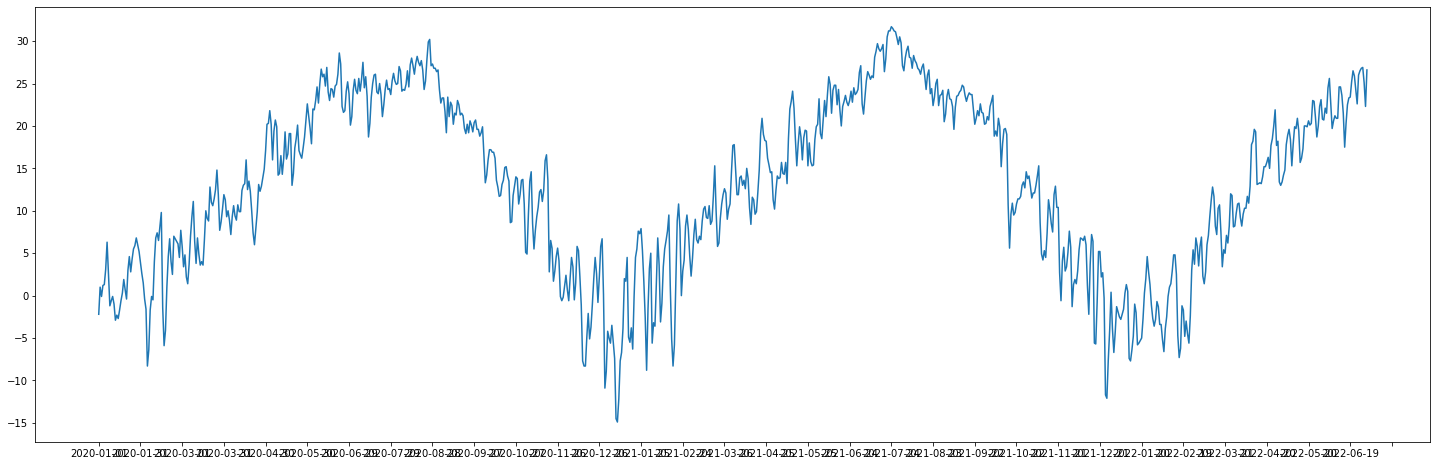

In [ ]:
fig, ax = plt.subplots(figsize=(25,8))
ax.set_xticks(np.arange(0,999,30)) #인덱스 번호 넣어줌
ax.set_yticks(range(-20,40,5)) #기온
ax.plot(df_avgTa)
plt.show()

In [ ]:
#이동평균


**이동평균**
<ul>데이터 변환 방법
<li>평활화: 이상값 제거</li>
<li>집계: </li>
<li>일반화</li>
<li>정규화: 0~1사이</li>
<li>범주화</li>
</ul>

standarization: 평균0분산1으로 설정. 정규화와다르다

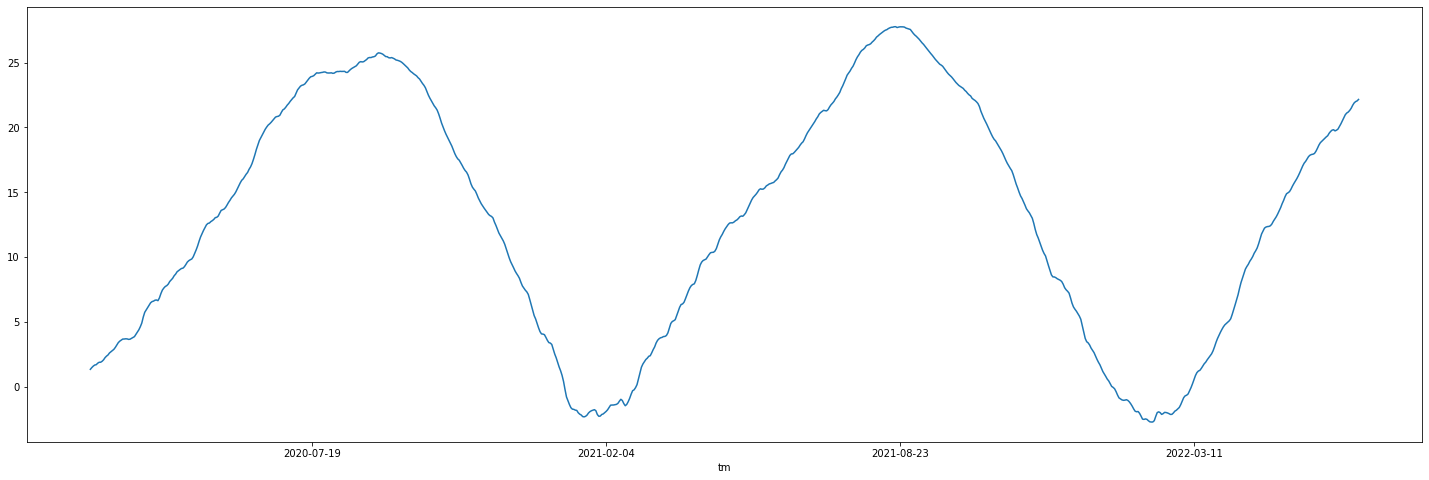

In [ ]:
#rolling: 변동이 잦은 데이터에서의 추세, 계절, 주기를 찾는 방법 : 그래프를 뭉개서 표현해서 이해하기 쉽게함
fig, ax = plt.subplots(figsize=(25,8))
df_avgTa['avgTa'].rolling(50).mean().plot(ax=ax)
plt.show()